In [9]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from os.path import basename

import cPickle
import h5py
import yaml

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
# matplotlib.rcParams['text.usetex']=False
# matplotlib.rcParams['text.latex.unicode']=True

iterations_per_epoch = 17296

from matplotlib import cm

def get_colors(number_of_lines):
    start = 0.0
    stop = 1.0
    cm_subsection = np.linspace(start, stop, number_of_lines) 

    colors = [ cm.viridis(x) for x in cm_subsection ]
    colors = colors[::-1]
    return colors



def plot_curves(datadir, exps, plot_train_loss=True, figsize=(10,10), colors=None, linewidth=2, xunits='epochs', downsample=1):
    fig=plt.figure(figsize=figsize)
    for iexp, exp in enumerate(exps):

        def get_x(nepochs, xunits, downsample):
            if xunits == 'epochs':
                return (np.arange(nepochs)+1)/float(downsample)
            elif xunits == 'iterations':
                x = np.arange(nepochs)+1
                return iterations_per_epoch*x/float(downsample)
        
        # plot the learning curves
        histfile=datadir + '/history/' + exp['histfile']
        label=exp['label']
        with open(histfile,'rb') as f:
            hist = cPickle.load(f)
        val_loss = hist['on_epoch_end']['val_loss']
        if colors is None:
            x=get_x(len(val_loss), xunits, downsample)
            p=plt.plot(x, val_loss, label=label, linewidth=linewidth)
        else:
            x=get_x(len(val_loss), xunits, downsample)
            p=plt.plot(x, val_loss, label=label, color=colors[iexp], linewidth=linewidth)
        if plot_train_loss:
            train_loss=hist['on_epoch_end']['loss']
            x=get_x(len(train_loss), xunits, downsample)
            plt.plot(x, train_loss, color=p[0].get_color(), linestyle=':', linewidth=linewidth+1)

        # count the trainable weights of the model
        modelfile = datadir + '/models/' + basename(histfile).replace('history','model') + '.hdf5'
        f = h5py.File(modelfile)
        paramsfile = datadir + '/configs/' + basename(histfile).replace('history', 'params') + '.yaml'
        with open(paramsfile,'rb') as fp:
            params = yaml.load(fp)
        num_params = 0
        for key in f.keys():
            for key2 in f[key]:
                for key3 in f[key][key2].keys():
                    #print f[key][key2][key3]
                    if 'params_trainable' in params.keys():

                        params_trainable = params['params_trainable'] + ['h0']

                        param_is_trainable = False
                        for name in params_trainable:
                            # for each name of the trainable weights
                            if name in key3:
                                # only count these weights as trainable if the parameter is trainable
                                param_is_trainable = True
                                #print "%s is trainable, since it contains %s" % (key3,name)

                        if not param_is_trainable:
                            continue

                    # print "Trainable weight %s has shape %s with size %d" % (key3,f[key][key2][key3].shape,np.prod(f[key][key2][key3].shape))
                    num_params = num_params + np.prod(f[key][key2][key3].shape)

        print "Model '%s' has %d trainable weights, best val_loss is %f" % (label,num_params,min(val_loss))
    return fig

Model 'LSTM, K=2, N=54' has 105071 trainable weights, best val_loss is 0.051167
Model 'LSTM, K=2, N=244' has 1030181 trainable weights, best val_loss is 0.048116
Model 'DR-SNMF, K=2, N=100' has 103002 trainable weights, best val_loss is 0.036235
Model 'DR-SNMF, K=2, N=1000' has 1030002 trainable weights, best val_loss is 0.035428
Model 'LSTM, K=5, N=70' has 268007 trainable weights, best val_loss is 0.054158
Model 'LSTM, K=5, N=250' has 2576507 trainable weights, best val_loss is 0.056552
Model 'DR-SNMF, K=5, N=100' has 257205 trainable weights, best val_loss is 0.033210
Model 'DR-SNMF, K=5, N=1000' has 2572005 trainable weights, best val_loss is 0.031583
Model 'LSTM, K=2, N=54' has 105071 trainable weights, best val_loss is 0.040835
Model 'LSTM, K=2, N=244' has 1030181 trainable weights, best val_loss is 0.033863
Model 'DR-SNMF, K=2, N=100' has 103002 trainable weights, best val_loss is 0.032010
Model 'DR-SNMF, K=2, N=1000' has 1030002 trainable weights, best val_loss is 0.029525
Mode

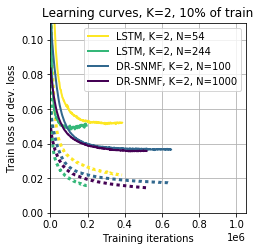

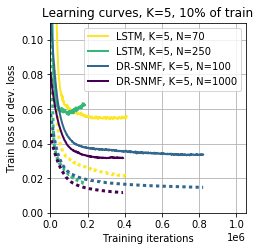

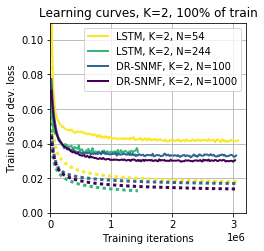

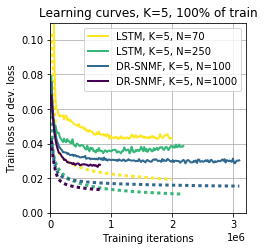

In [32]:
# training data downsampled by 10

plots=[{'datadir':'data_setup_db3355248efc7ce949ff0bc5206f0a81',
        'downsample':10,
        'xunits':'iterations',
        'xlim':[0,1.05e6],
        'fig_name':'figures/learning_curves_K2_ds10_3-5x3-5.pdf',
        'title':'Learning curves, K=2, 10% of train',
        'exps': [ {'histfile':'history_lstm_46666e232751074bd609167dc440df8c',
                   'label': 'LSTM, K=2, N=54'},
                  {'histfile':'history_lstm_b6da76df68cf530d091aa499d61143de',
                   'label': 'LSTM, K=2, N=244'},
                  {'histfile':'history_unfolded_snmf_a45e86a1cc146e1e9d7a7f8100d9d2d7',
                   'label': 'DR-SNMF, K=2, N=100'},
                  {'histfile':'history_unfolded_snmf_a23657edf96a44331501d773db837a1c',
                   'label': 'DR-SNMF, K=2, N=1000'},
                ]
        },
        {'datadir':'data_setup_db3355248efc7ce949ff0bc5206f0a81',
         'downsample':10,
         'xunits':'iterations',
         'xlim':[0,1.05e6],
         'fig_name':'figures/learning_curves_K5_ds10_3-5x3-5.pdf',
         'title':'Learning curves, K=5, 10% of train',
         'exps': [ {'histfile':'history_lstm_6a4fc9017283c9f89380f765a60087ce',
                   'label': 'LSTM, K=5, N=70'},
                  {'histfile':'history_lstm_4561bd13e267026c3f3d1c936b15f709',
                   'label': 'LSTM, K=5, N=250'},
                  {'histfile':'history_unfolded_snmf_ea1e7d485421e527486476ef696da2da',
                   'label': 'DR-SNMF, K=5, N=100'},
                  {'histfile':'history_unfolded_snmf_364ccd17a3e187bcccd30cfaa6bd9422',
                   'label': 'DR-SNMF, K=5, N=1000'}
                 ]
        },
        {'datadir':'data_setup_cc061d1dc474f44165340bb36f11b16d',
        'downsample':1,
        'xunits':'iterations',
        'xlim':[0,3.2e6],
        'fig_name':'figures/learning_curves_K2_ds1_3-5x3-5.pdf',
        'title':'Learning curves, K=2, 100% of train',
        'exps': [ {'histfile':'history_lstm_46666e232751074bd609167dc440df8c',
                   'label': 'LSTM, K=2, N=54'},
                  {'histfile':'history_lstm_b6da76df68cf530d091aa499d61143de',
                   'label': 'LSTM, K=2, N=244'},
                  {'histfile':'history_unfolded_snmf_a45e86a1cc146e1e9d7a7f8100d9d2d7',
                   'label': 'DR-SNMF, K=2, N=100'},
                  {'histfile':'history_unfolded_snmf_a23657edf96a44331501d773db837a1c',
                   'label': 'DR-SNMF, K=2, N=1000'},
                ]
        },
        {'datadir':'data_setup_cc061d1dc474f44165340bb36f11b16d',
         'downsample':1,
         'xunits':'iterations',
         'xlim':[0,3.2e6],
         'fig_name':'figures/learning_curves_K5_ds1_3-5x3-5.pdf',
         'title':'Learning curves, K=5, 100% of train',
         'exps': [ {'histfile':'history_lstm_6a4fc9017283c9f89380f765a60087ce',
                   'label': 'LSTM, K=5, N=70'},
                  {'histfile':'history_lstm_4561bd13e267026c3f3d1c936b15f709',
                   'label': 'LSTM, K=5, N=250'},
                  {'histfile':'history_unfolded_snmf_ea1e7d485421e527486476ef696da2da',
                   'label': 'DR-SNMF, K=5, N=100'},
                  {'histfile':'history_unfolded_snmf_364ccd17a3e187bcccd30cfaa6bd9422',
                   'label': 'DR-SNMF, K=5, N=1000'}
                 ]
        },
]

for iplot, plot in enumerate(plots):

    datadir=plot['datadir']
    downsample=plot['downsample']
    xunits=plot['xunits']
    xlim=plot['xlim']

    fig_name=plot['fig_name']
    title=plot['title']
    
    exps=plot['exps']

    colors=get_colors(4)

    only_big_models=False
    if only_big_models:
        exps=[exps[1],exps[3]]
        colors=get_colors(2)

    plot_train_loss = True
    ylim=None
    ylim=[0.0,0.11]

    fig=plot_curves(datadir, exps, plot_train_loss=plot_train_loss, figsize=(3.5,3.5), colors=colors, xunits='iterations', downsample=downsample)

    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    plt.title(title)
    plt.legend()#loc='center left')#, bbox_to_anchor=(1, 0.5))
    plt.grid()
    if xunits=='epochs':
        plt.xlabel('Epochs')
    elif xunits=='iterations':
        plt.xlabel('Training iterations')
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ylabel('Train loss or dev. loss')

    fig.savefig(fig_name, bbox_inches='tight')

Model 'LSTM, K=5, N=70' has 268007 trainable weights, best val_loss is 0.054158
Model 'LSTM, K=5, N=250' has 2576507 trainable weights, best val_loss is 0.056552
Model 'DR-SNMF, K=5, N=100' has 257205 trainable weights, best val_loss is 0.033210
Model 'DR-SNMF, K=5, N=1000' has 2572005 trainable weights, best val_loss is 0.031583


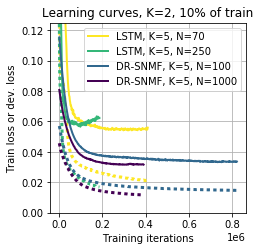

In [15]:
# training data downsampled by 10
datadir='data_setup_db3355248efc7ce949ff0bc5206f0a81'

fig_name='figures/learning_curves_K5_ds10_3-5x3-5.pdf'

exps=[ \
#       {'histfile':'history_lstm_46666e232751074bd609167dc440df8c',
#        'label': 'LSTM, K=2, N=54'},
#       {'histfile':'history_lstm_b6da76df68cf530d091aa499d61143de',
#        'label': 'LSTM, K=2, N=244'},
      {'histfile':'history_lstm_6a4fc9017283c9f89380f765a60087ce',
       'label': 'LSTM, K=5, N=70'},
      {'histfile':'history_lstm_4561bd13e267026c3f3d1c936b15f709',
       'label': 'LSTM, K=5, N=250'},
#       {'histfile':'history_unfolded_snmf_a45e86a1cc146e1e9d7a7f8100d9d2d7',
#        'label': 'DR-SNMF, K=2, N=100'},
#       {'histfile':'history_unfolded_snmf_a23657edf96a44331501d773db837a1c',
#        'label': 'DR-SNMF, K=2, N=1000'},
      {'histfile':'history_unfolded_snmf_ea1e7d485421e527486476ef696da2da',
       'label': 'DR-SNMF, K=5, N=100'},
      {'histfile':'history_unfolded_snmf_364ccd17a3e187bcccd30cfaa6bd9422',
       'label': 'DR-SNMF, K=5, N=1000'}
     ]

colors=get_colors(4)

only_big_models=True
only_big_models=False
if only_big_models:
    exps=[exps[1],exps[3]]
    colors=get_colors(2)

plot_train_loss = False
plot_train_loss = True
xlim=None
xlim=[0,400]
# xlim=[100,200]
# xlim=[300,350]
ylim=None
ylim=[0.0,0.125]
# ylim=[0.03,0.04]
# ylim=[0.,0.05]

fig=plot_curves(datadir, exps, plot_train_loss=plot_train_loss, figsize=(3.5,3.5), colors=colors)

if xlim is not None:
    plt.xlim(xlim)
if ylim is not None:
    plt.ylim(ylim)
plt.title('Learning curves, K=5, 10% of train')
plt.legend()#loc='center left')#, bbox_to_anchor=(1, 0.5))
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Train loss or dev. loss')

fig.savefig(fig_name, bbox_inches='tight')

Model 'LSTM, K=2, N=54' has 105071 trainable weights, best val_loss is 0.040835
Model 'LSTM, K=2, N=244' has 1030181 trainable weights, best val_loss is 0.033863
Model 'uSNMF, K=2, N=100' has 103002 trainable weights, best val_loss is 0.032010
Model 'uSNMF, K=2, N=1000' has 1030002 trainable weights, best val_loss is 0.029525


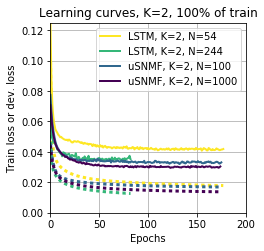

In [7]:
# training data downsampled by 1, K=2
datadir='data_setup_cc061d1dc474f44165340bb36f11b16d'

fig_name='figures/learning_curves_K2_ds1_3-5x3-5.pdf'

exps=[{'histfile':'history_lstm_46666e232751074bd609167dc440df8c',
       'label': 'LSTM, K=2, N=54'},
      {'histfile':'history_lstm_b6da76df68cf530d091aa499d61143de',
       'label': 'LSTM, K=2, N=244'},
      {'histfile':'history_unfolded_snmf_a45e86a1cc146e1e9d7a7f8100d9d2d7',
       'label': 'uSNMF, K=2, N=100'},
      {'histfile':'history_unfolded_snmf_a23657edf96a44331501d773db837a1c',
       'label': 'uSNMF, K=2, N=1000'}
     ]

colors=get_colors(4)

only_big_models=True
only_big_models=False
if only_big_models:
    exps=[exps[1],exps[3]]
    colors=get_colors(2)

plot_train_loss = False
plot_train_loss = True
xlim=None
xlim=[0,200]
# xlim=[100,200]
# xlim=[300,350]
ylim=None
ylim=[0.0,0.125]
# ylim=[0.03,0.04]
# ylim=[0.,0.05]

fig=plot_curves(datadir, exps, plot_train_loss=plot_train_loss, figsize=(3.5,3.5), colors=colors)

if xlim is not None:
    plt.xlim(xlim)
if ylim is not None:
    plt.ylim(ylim)
plt.title('Learning curves, K=2, 100% of train')
plt.legend()#loc='center left')#, bbox_to_anchor=(1, 0.5))
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Train loss or dev. loss')

fig.savefig(fig_name, bbox_inches='tight')

Model 'LSTM, K=5, N=70' has 268007 trainable weights, best val_loss is 0.042590
Model 'LSTM, K=5, N=250' has 2576507 trainable weights, best val_loss is 0.034364
Model 'DR-SNMF, K=5, N=100' has 257205 trainable weights, best val_loss is 0.028558
Model 'DR-SNMF, K=5, N=1000' has 2572005 trainable weights, best val_loss is 0.026553


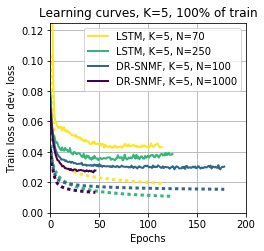

In [8]:
# training data downsampled by 1
datadir='data_setup_cc061d1dc474f44165340bb36f11b16d'

fig_name='figures/learning_curves_K5_ds1_3-5x3-5.pdf'

exps=[ \
#       {'histfile':'history_lstm_46666e232751074bd609167dc440df8c',
#        'label': 'LSTM, K=2, N=54'},
#       {'histfile':'history_lstm_b6da76df68cf530d091aa499d61143de',
#        'label': 'LSTM, K=2, N=244'},
      {'histfile':'history_lstm_6a4fc9017283c9f89380f765a60087ce',
       'label': 'LSTM, K=5, N=70'},
      {'histfile':'history_lstm_4561bd13e267026c3f3d1c936b15f709',
       'label': 'LSTM, K=5, N=250'},
#       {'histfile':'history_unfolded_snmf_a45e86a1cc146e1e9d7a7f8100d9d2d7',
#        'label': 'DR-SNMF, K=2, N=100'},
#       {'histfile':'history_unfolded_snmf_a23657edf96a44331501d773db837a1c',
#        'label': 'DR-SNMF, K=2, N=1000'},
      {'histfile':'history_unfolded_snmf_ea1e7d485421e527486476ef696da2da',
       'label': 'DR-SNMF, K=5, N=100'},
      {'histfile':'history_unfolded_snmf_364ccd17a3e187bcccd30cfaa6bd9422',
       'label': 'DR-SNMF, K=5, N=1000'}
     ]

colors=get_colors(4)

only_big_models=False
if only_big_models:
    exps=[exps[1],exps[3]]
    colors=get_colors(2)

plot_train_loss = False
plot_train_loss = True
xlim=None
xlim=[0,200]
# xlim=[100,200]
# xlim=[300,350]
ylim=None
ylim=[0.0,0.125]
# ylim=[0.03,0.04]
# ylim=[0.,0.05]

fig=plot_curves(datadir, exps, plot_train_loss=plot_train_loss, figsize=(3.5,3.5), colors=colors)

if xlim is not None:
    plt.xlim(xlim)
if ylim is not None:
    plt.ylim(ylim)
plt.title('Learning curves, K=5, 100% of train')
plt.legend()#loc='center left')#, bbox_to_anchor=(1, 0.5))
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Train loss or dev. loss')

fig.savefig(fig_name, bbox_inches='tight')